In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("home price.csv")

In [81]:
df.isnull().sum()

area     0
price    0
dtype: int64

In [82]:
df.isnull().any()

area     False
price    False
dtype: bool

In [83]:
df.describe()

,area,price
count,10.000000,10.000000
mean,3280.000000,57850.000000
std,1171.703413,22740.138278
min,1200.000000,17000.000000
25%,2625.000000,43750.000000
50%,3100.000000,58750.000000
75%,3900.000000,70250.000000
max,5000.000000,100000.000000


In [84]:
df.head()

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000


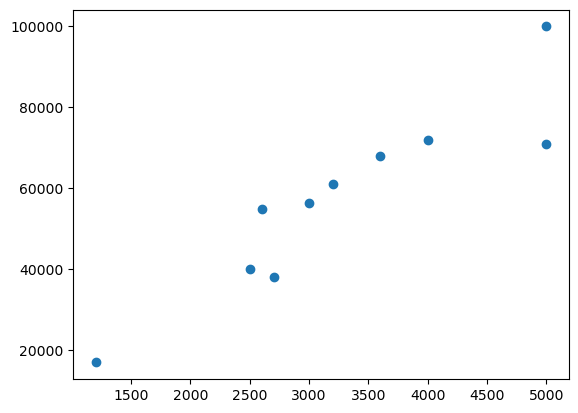

In [11]:
plt.scatter(df["area"], df["price"])
plt.show()

In [85]:
x = df[["area"]] # independant variables 
y = df["price"] # dependant variables

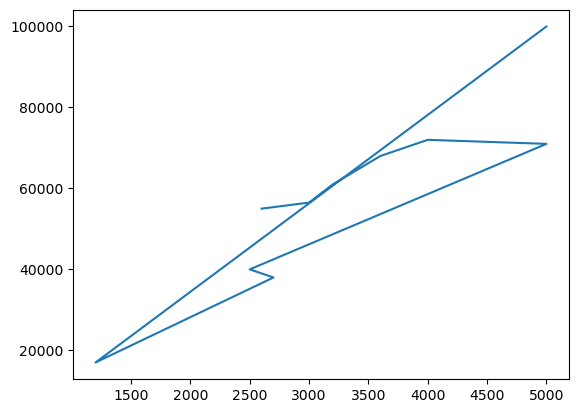

In [86]:
plt.plot(x,y)

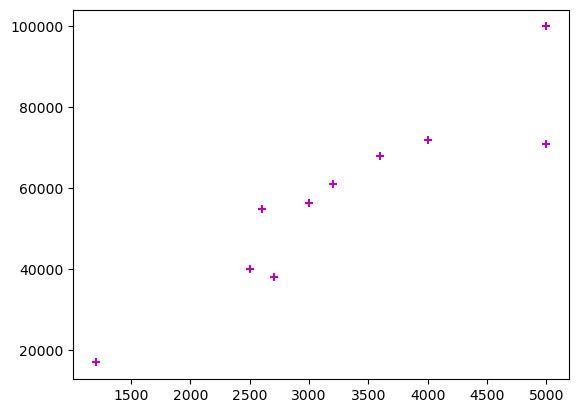

In [87]:
plt.scatter(x,y, marker="+", c="m")

### Train Test Split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

#### Using Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
regr = LinearRegression()

In [92]:
regr.fit(xtrain,ytrain)

LinearRegression()

In [93]:
regr.predict(xtest) # then it'll print ytest, that means price of the house 

array([54577.95521897, 81852.07441554, 43971.35330919])

In [94]:
regr.predict([[5000]])

D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([81852.07441554])

### Draw a best fit lline

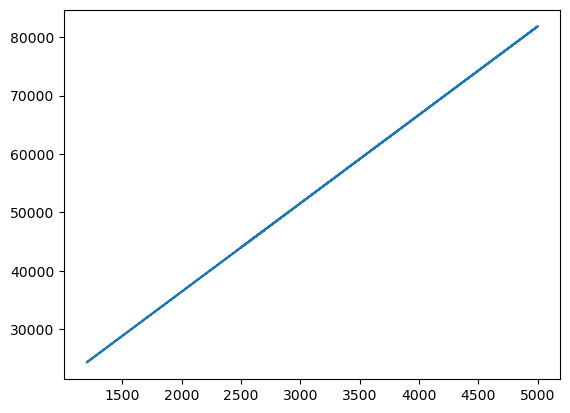

In [95]:
plt.plot(x, regr.predict(x)) # or it could be "regr.predict(df[["area"]])"

In [96]:
regr.predict(df[["area"]])

array([45486.58215344, 51547.49753046, 54577.95521897, 60638.87059598,
       66699.785973  , 81852.07441554, 43971.35330919, 47001.8109977 ,
       24273.37833388, 81852.07441554])

In [97]:
y

0     55000
1     56500
2     61000
3     68000
4     72000
5     71000
6     40000
7     38000
8     17000
9    100000
Name: price, dtype: int64

In [98]:
regr.predict(x)

array([45486.58215344, 51547.49753046, 54577.95521897, 60638.87059598,
       66699.785973  , 81852.07441554, 43971.35330919, 47001.8109977 ,
       24273.37833388, 81852.07441554])

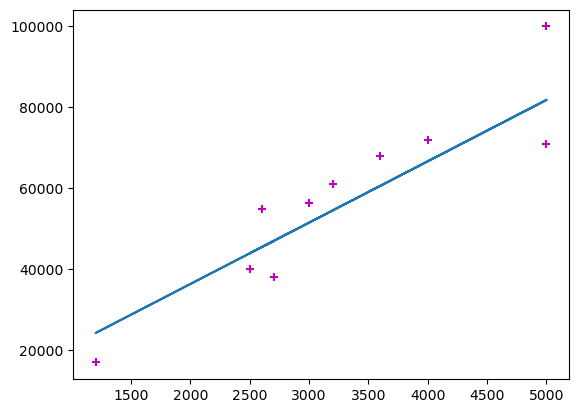

In [99]:
plt.scatter(x,y,marker="+",c="m")
plt.plot(x, regr.predict(df[["area"]])) # or it could be "regr.predict(df[["area"]])"

In [100]:
m = regr.coef_

In [101]:
c = regr.intercept_

In [103]:
m

array([15.15228844])

In [104]:
c

6090.632202831752

In [106]:
xtest

,area
2,3200
9,5000
6,2500


In [108]:
x = int(input("Enter an Area for the house: "))

Enter an Area for the house: 3200


In [109]:
y = m*x + c

In [110]:
y

array([54577.95521897])

### Accuracy check

In [111]:
from sklearn.metrics import r2_score

In [112]:
predictxtest = regr.predict(xtest)

In [113]:
predictxtest

array([54577.95521897, 81852.07441554, 43971.35330919])

In [114]:
ytest

2     61000
9    100000
6     40000
Name: price, dtype: int64

In [115]:
xtest

,area
2,3200
9,5000
6,2500


In [116]:
accuracy = r2_score(ytest, predictxtest)
accuracy

0.7916065214158408

In [119]:
print(f"Accuracy level is {accuracy} between 0 - 1")

Accuracy level is 0.7916065214158408 between 0 - 1


# THE END